In [237]:
import pandas as pd

In [238]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

In [239]:
!pip install lxml

In [240]:
df = df[['회사명', '종목코드']]

In [241]:
df = df.rename(columns={'회사명': 'name', '종목코드': 'code'})

In [242]:
df

,name,code
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3874,툴젠,199800
3875,플럼라인생명과학,222670
3876,피엔에이치테크,239890
3877,한국미라클피플사,331660


In [243]:
df.code = df.code.map('{:06d}'.format)

In [244]:
import pandas_datareader as pdr

In [245]:
df = pdr.get_data_yahoo('005930.KS')

In [246]:
df = df[['Close']]

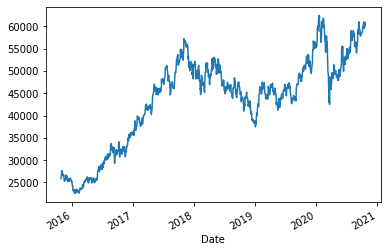

In [247]:
df['Close'].plot()

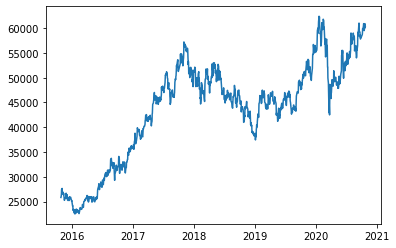

In [284]:
plt.plot(df.index, df['Close'])

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [197]:
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [287]:
s_train = scaler.transform(df)
s_train.shape

(1220, 1)

In [199]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [200]:
length = 20
generator = TimeseriesGenerator(s_train, s_train, length=length, batch_size=1)

In [285]:
s_train[:1020]

array([[0.08324975],
       [0.08625878],
       [0.09127382],
       ...,
       [0.85205617],
       [0.83450351],
       [0.81945838]])

In [288]:
model_LSTM = tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(100, input_shape=(1220,1)))
model_LSTM.add(tf.keras.layers.Dense(1))

In [289]:
model_LSTM.compile(optimizer='adam', loss='mse')

In [290]:
model_LSTM.fit(generator, epochs = 5)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 8.5186e-04
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 7.6328e-04
Epoch 5/5
1200/1200 [==============================] - 4s 4ms/step - loss: 5.9366e-04


In [312]:
batch = s_train[-30:]

In [318]:
forecast_LSTM = []
c_batch = batch.reshape((1, 30, 1))

for i in range(100):
    c_predict = model_LSTM.predict(c_batch)[0]
    forecast_LSTM.append(c_predict)
    c_batch = np.append(c_batch[:,1:,:],[[c_predict]], axis = 1)

In [319]:
forecast_LSTM = scaler.inverse_transform(forecast_LSTM)

In [320]:
forecast_LSTM

array([[60538.5428977 ],
       [60858.15640926],
       [61195.61193228],
       [61515.91478348],
       [61818.55865479],
       [62106.37696981],
       [62381.50905848],
       [62645.19097805],
       [62898.19288731],
       [63141.06388092],
       [63374.30313587],
       [63598.37179661],
       [63813.71199131],
       [64020.74683189],
       [64219.86615181],
       [64411.42175198],
       [64595.73215485],
       [64773.08260441],
       [64943.72982025],
       [65107.90675163],
       [65265.85585594],
       [65417.77680397],
       [65563.85975838],
       [65704.31389809],
       [65839.33889389],
       [65969.12490845],
       [66093.82407188],
       [66213.60277653],
       [66328.61790657],
       [66439.05011654],
       [66545.05153656],
       [66646.76478863],
       [66744.351511  ],
       [66837.93530941],
       [66927.66831398],
       [67013.68839264],
       [67096.12390518],
       [67175.11271954],
       [67250.77368736],
       [67323.24943066],


In [321]:
forecast_index = pd.date_range('2020-10-23', periods=100)
forecast_index

DatetimeIndex(['2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
      

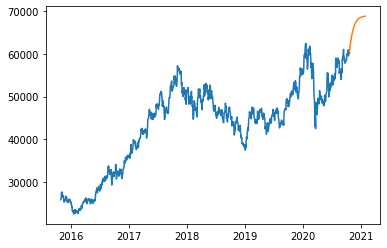

In [322]:
plt.plot(df.index, df['Close'])
plt.plot(forecast_index, forecast_LSTM)